In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
data = pd.read_csv('/content/tips (data for regression problem).csv')

In [ ]:
# Check the dataset structure
print(data.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [ ]:
# Check the column names
print("Columns in dataset:", data.columns)

# Update target and features based on the actual column name
target_column = 'total_bill'  # Change this to the actual column name if different
if target_column not in data.columns:
    raise ValueError(f"'{target_column}' column not found in the dataset. Please check column names.")

# Define the target and features
X = data.drop(target_column, axis=1)  # Features
y = data[target_column]  # Target variable (tip amount)

Columns in dataset: Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


In [ ]:
# One-Hot Encode categorical variables
data = pd.get_dummies(data, drop_first=True)

# Define the target and features
X = data.drop('total_bill', axis=1)  # Features
y = data['total_bill']  # Target variable (tip amount)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for certain models (like SVR and KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Dictionary to store models and results
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='linear'),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

results = {}

In [ ]:
# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")

    # Use scaled data for models that are sensitive to feature scaling
    if model_name in ['SVR', 'KNN']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R^2': r2}

    print(f"{model_name} - MSE: {mse:.4f}, R^2: {r2:.4f}")


Training Linear Regression...
Linear Regression - MSE: 31.8736, R^2: 0.6241

Training Ridge Regression...
Ridge Regression - MSE: 31.7453, R^2: 0.6256

Training Lasso Regression...
Lasso Regression - MSE: 31.2841, R^2: 0.6310

Training Decision Tree...
Decision Tree - MSE: 43.7610, R^2: 0.4839

Training Random Forest...
Random Forest - MSE: 41.2323, R^2: 0.5137

Training SVR...
SVR - MSE: 28.2899, R^2: 0.6663

Training KNN...
KNN - MSE: 58.0019, R^2: 0.3159


In [ ]:
# Display all results
print("\nModel Performance:")
for model, metrics in results.items():
    print(f"{model} - MSE: {metrics['MSE']:.4f}, R^2: {metrics['R^2']:.4f}")


Model Performance:
Linear Regression - MSE: 31.8736, R^2: 0.6241
Ridge Regression - MSE: 31.7453, R^2: 0.6256
Lasso Regression - MSE: 31.2841, R^2: 0.6310
Decision Tree - MSE: 43.7610, R^2: 0.4839
Random Forest - MSE: 41.2323, R^2: 0.5137
SVR - MSE: 28.2899, R^2: 0.6663
KNN - MSE: 58.0019, R^2: 0.3159


In [ ]:
# Feature importance for tree-based models and regularization models
def display_feature_importance(model, model_name, feature_names):
    if hasattr(model, 'coef_'):
        print(f"\n{model_name} Coefficients:")
        coef = model.coef_
        for feature, importance in zip(feature_names, coef):
            print(f"{feature}: {importance:.4f}")
    elif hasattr(model, 'feature_importances_'):
        print(f"\n{model_name} Feature Importances:")
        importances = model.feature_importances_
        for feature, importance in zip(feature_names, importances):
            print(f"{feature}: {importance:.4f}")

In [ ]:
# Display feature importance for Lasso, Ridge, Decision Tree, and Random Forest
display_feature_importance(models['Lasso Regression'], 'Lasso Regression', X.columns)
display_feature_importance(models['Ridge Regression'], 'Ridge Regression', X.columns)
display_feature_importance(models['Decision Tree'], 'Decision Tree', X.columns)
display_feature_importance(models['Random Forest'], 'Random Forest', X.columns)



Lasso Regression Coefficients:
tip: 2.9455
size: 2.9909
sex_Male: 0.4857
smoker_Yes: 2.1664
day_Sat: 0.6272
day_Sun: -0.0000
day_Thur: 0.0000
time_Lunch: -1.5333

Ridge Regression Coefficients:
tip: 2.9247
size: 3.1034
sex_Male: 0.8754
smoker_Yes: 2.6553
day_Sat: 0.4820
day_Sun: -0.5327
day_Thur: 2.3361
time_Lunch: -4.1161

Decision Tree Feature Importances:
tip: 0.4696
size: 0.3413
sex_Male: 0.0398
smoker_Yes: 0.0569
day_Sat: 0.0332
day_Sun: 0.0302
day_Thur: 0.0045
time_Lunch: 0.0244

Random Forest Feature Importances:
tip: 0.5160
size: 0.2837
sex_Male: 0.0486
smoker_Yes: 0.0695
day_Sat: 0.0260
day_Sun: 0.0349
day_Thur: 0.0118
time_Lunch: 0.0095


In [ ]:
# Function to evaluate models with multiple metrics
def evaluate_model(name, model, X_train, y_train, X_test, y_test, use_scaled=False):
    # Fit model
    if use_scaled:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print metrics
    print(f"{name} - MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R^2: {r2:.2f}")
    return model, mae, mse, rmse, r2

# Initialize and evaluate each model
results = []

print("Linear Regression:")
linear_model, *metrics = evaluate_model("Linear Regression", LinearRegression(), X_train, y_train, X_test, y_test)
results.append(("Linear Regression", *metrics))

print("\nRidge Regression:")
ridge_model, *metrics = evaluate_model("Ridge Regression", Ridge(alpha=1.0), X_train, y_train, X_test, y_test)
results.append(("Ridge Regression", *metrics))

print("\nLasso Regression:")
lasso_model, *metrics = evaluate_model("Lasso Regression", Lasso(alpha=0.1), X_train, y_train, X_test, y_test)
results.append(("Lasso Regression", *metrics))

print("\nDecision Tree Regression:")
tree_model, *metrics = evaluate_model("Decision Tree Regression", DecisionTreeRegressor(max_depth=5), X_train, y_train, X_test, y_test)
results.append(("Decision Tree Regression", *metrics))

print("\nRandom Forest Regression:")
forest_model, *metrics = evaluate_model("Random Forest Regression", RandomForestRegressor(n_estimators=100, random_state=42), X_train, y_train, X_test, y_test)
results.append(("Random Forest Regression", *metrics))

print("\nSupport Vector Regression (SVR):")
svr_model, *metrics = evaluate_model("Support Vector Regression", SVR(C=1.0, epsilon=0.1), X_train, y_train, X_test, y_test, use_scaled=True)
results.append(("SVR", *metrics))

print("\nK-Nearest Neighbors Regression (KNN):")
knn_model, *metrics = evaluate_model("KNN Regression", KNeighborsRegressor(n_neighbors=5), X_train, y_train, X_test, y_test, use_scaled=True)
results.append(("KNN", *metrics))

# Display summary of all results
results_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "R^2"])
print("\nSummary of Model Performance:")
print(results_df)

Linear Regression:
Linear Regression - MAE: 4.47, MSE: 31.87, RMSE: 5.65, R^2: 0.62

Ridge Regression:
Ridge Regression - MAE: 4.45, MSE: 31.75, RMSE: 5.63, R^2: 0.63

Lasso Regression:
Lasso Regression - MAE: 4.38, MSE: 31.28, RMSE: 5.59, R^2: 0.63

Decision Tree Regression:
Decision Tree Regression - MAE: 4.94, MSE: 43.05, RMSE: 6.56, R^2: 0.49

Random Forest Regression:
Random Forest Regression - MAE: 4.64, MSE: 41.23, RMSE: 6.42, R^2: 0.51

Support Vector Regression (SVR):
Support Vector Regression - MAE: 5.00, MSE: 51.99, RMSE: 7.21, R^2: 0.39

K-Nearest Neighbors Regression (KNN):
KNN Regression - MAE: 5.53, MSE: 58.00, RMSE: 7.62, R^2: 0.32

Summary of Model Performance:
                      Model       MAE        MSE      RMSE       R^2
0         Linear Regression  4.470042  31.873636  5.645674  0.624081
1          Ridge Regression  4.450541  31.745284  5.634295  0.625595
2          Lasso Regression  4.375671  31.284137  5.593222  0.631033
3  Decision Tree Regression  4.940418

<ipython-input-38-a4f78e9e5394>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MAE", data=results_df, ax=axes[0], palette="Blues_d")
<ipython-input-38-a4f78e9e5394>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")
<ipython-input-38-a4f78e9e5394>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="RMSE", data=results_df, ax=axes[1], palette="Greens_d")
<ipython-input-38-a4f78e9e5394>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fixe

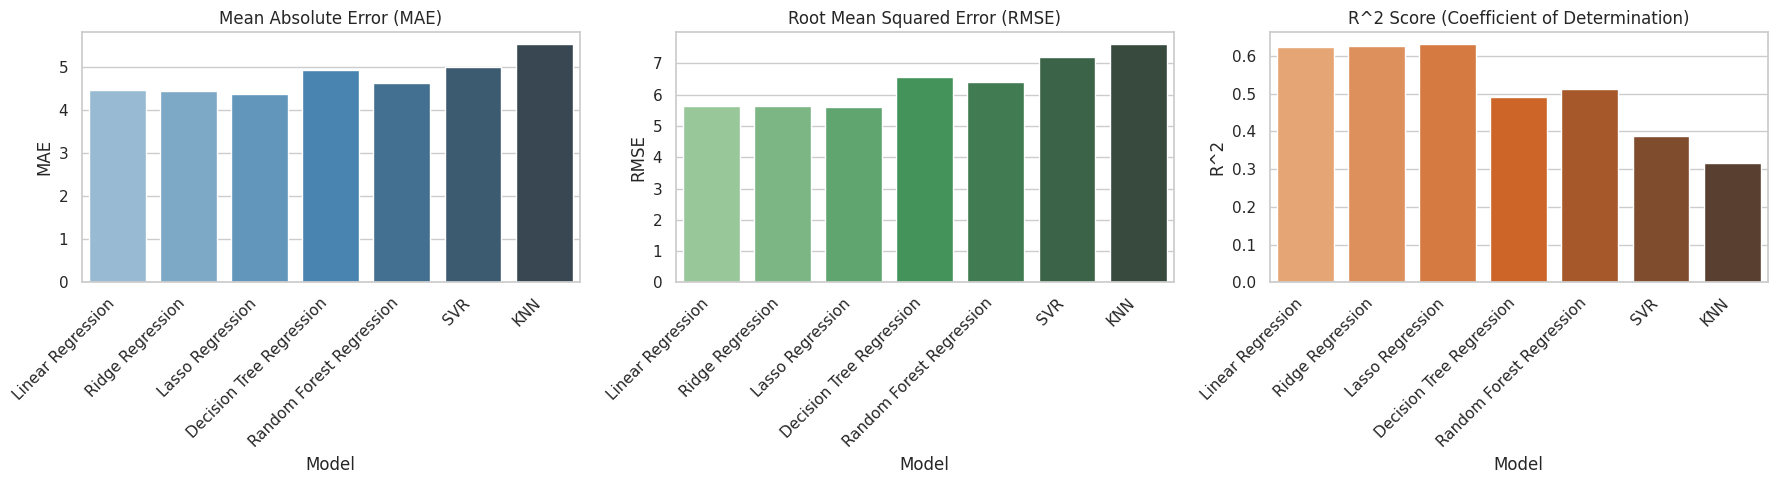

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the style for the plots
sns.set(style="whitegrid")

# Plot MAE, RMSE, and R^2 scores for each model
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot Mean Absolute Error (MAE)
sns.barplot(x="Model", y="MAE", data=results_df, ax=axes[0], palette="Blues_d")
axes[0].set_title("Mean Absolute Error (MAE)")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")

# Plot Root Mean Squared Error (RMSE)
sns.barplot(x="Model", y="RMSE", data=results_df, ax=axes[1], palette="Greens_d")
axes[1].set_title("Root Mean Squared Error (RMSE)")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha="right")

# Plot R^2 Score
sns.barplot(x="Model", y="R^2", data=results_df, ax=axes[2], palette="Oranges_d")
axes[2].set_title("R^2 Score (Coefficient of Determination)")
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha="right")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


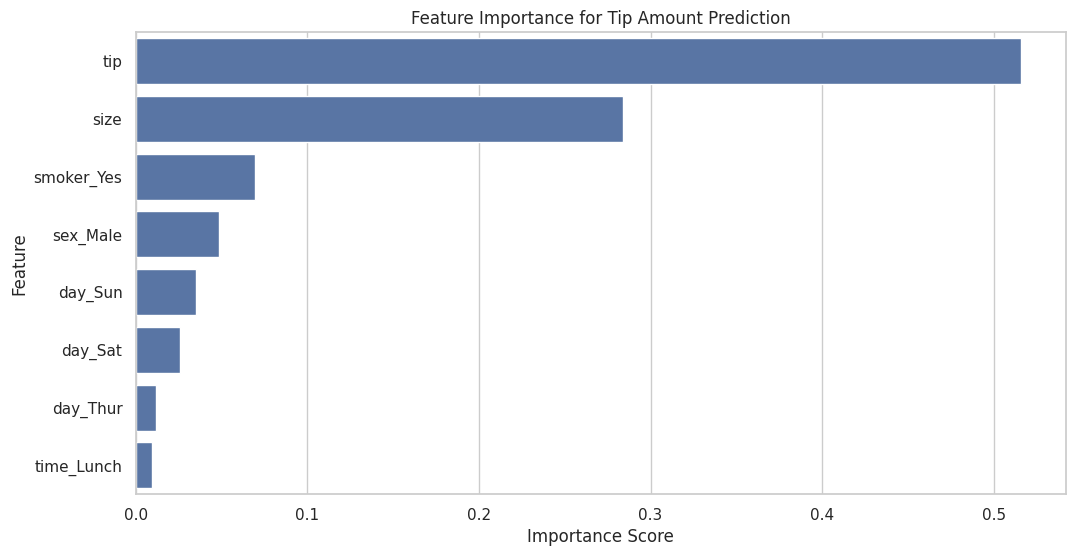

Top 5 Important Features:
      Feature  Importance
0         tip    0.515982
1        size    0.283686
3  smoker_Yes    0.069511
2    sex_Male    0.048636
5     day_Sun    0.034912


In [ ]:
# Feature Importance Analysis using Random Forest
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance from Random Forest
importance = forest_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Tip Amount Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Print important features
print("Top 5 Important Features:")
print(importance_df.head(5))


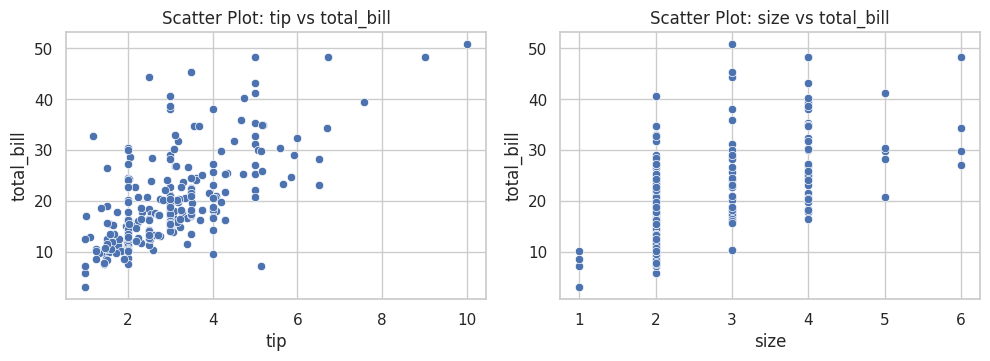

In [ ]:
# Scatter plot for each numerical feature against the target variable
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=data[feature], y=data[target_column])
    plt.title(f'Scatter Plot: {feature} vs {target_column}')
    plt.xlabel(feature)
    plt.ylabel(target_column)

plt.tight_layout()
plt.show()


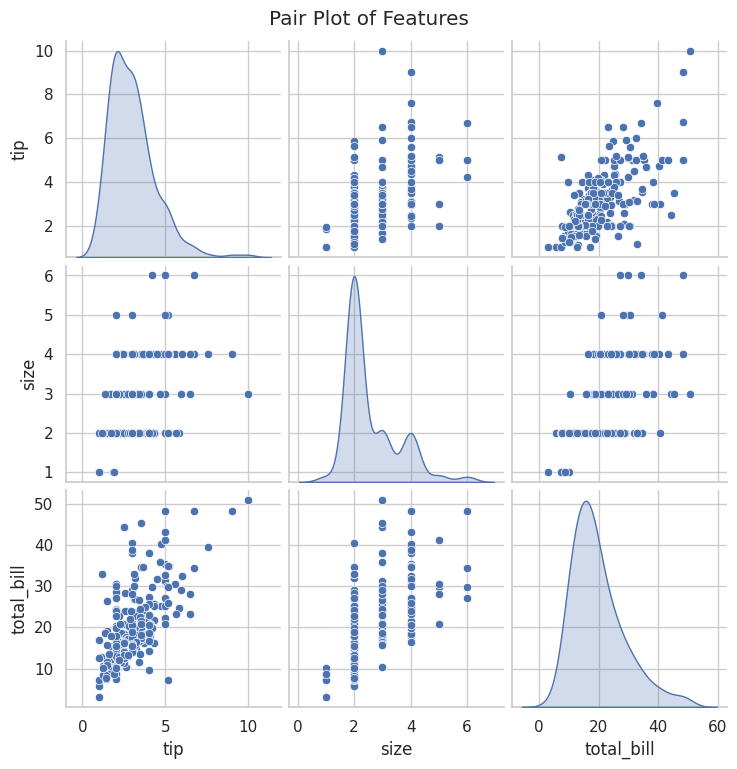

In [ ]:
# Pair plot for numerical features
sns.pairplot(data[numerical_features.tolist() + [target_column]], diag_kind='kde')
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()


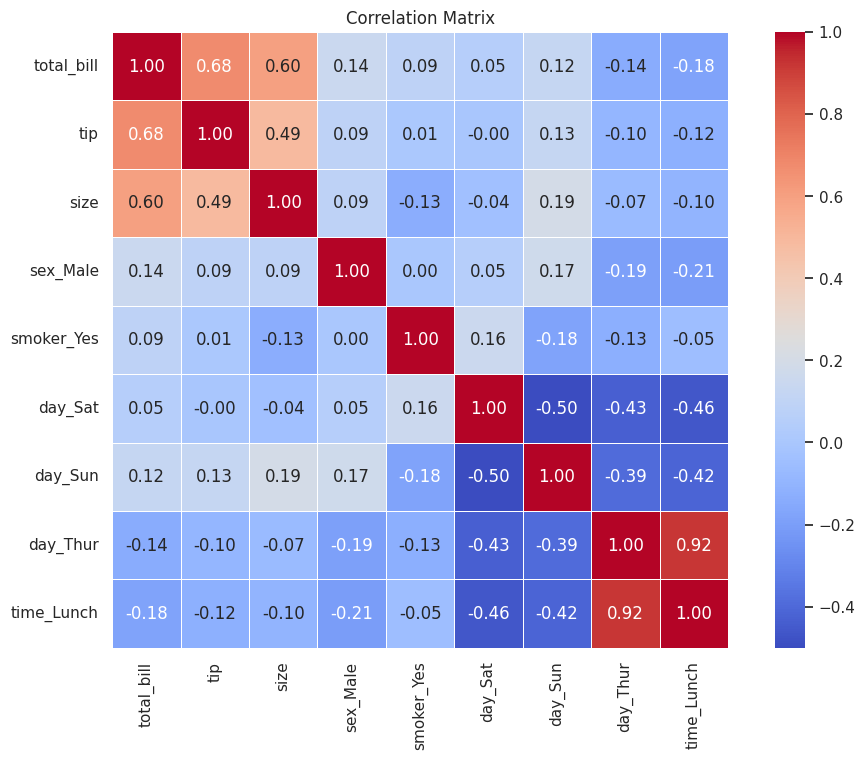

In [ ]:
# Correlation matrix
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import numpy as np
import pandas as pd

# Check the data types of each column
print("Data Types:")
print(data.dtypes)

# Convert the entire DataFrame to a NumPy array
data_array = np.asarray(data)

# Check the dtype of the array
print("\nData Array:")
print(data_array)
print("\nData Array Dtype:", data_array.dtype)

# Identify any non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns.tolist()
print("\nNon-Numeric Columns:", non_numeric_columns)


Data Types:
total_bill    float64
tip           float64
size            int64
sex_Male         bool
smoker_Yes       bool
day_Sat          bool
day_Sun          bool
day_Thur         bool
time_Lunch       bool
dtype: object

Data Array:
[[16.99 1.01 2 ... True False False]
 [10.34 1.66 3 ... True False False]
 [21.01 3.5 3 ... True False False]
 ...
 [22.67 2.0 2 ... False False False]
 [17.82 1.75 2 ... False False False]
 [18.78 3.0 2 ... False True False]]

Data Array Dtype: object

Non-Numeric Columns: ['sex_Male', 'smoker_Yes', 'day_Sat', 'day_Sun', 'day_Thur', 'time_Lunch']


In [ ]:
# Convert categorical columns to numeric using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Re-check data types after encoding
print("\nEncoded Data Types:")
print(data_encoded.dtypes)

# Now we can convert to NumPy array again
data_array_cleaned = np.asarray(data_encoded)

# Check the new dtype
print("\nCleaned Data Array Dtype:", data_array_cleaned.dtype)



Encoded Data Types:
total_bill    float64
tip           float64
size            int64
sex_Male         bool
smoker_Yes       bool
day_Sat          bool
day_Sun          bool
day_Thur         bool
time_Lunch       bool
dtype: object

Cleaned Data Array Dtype: object


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Performance:")
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R^2: {r2:.2f}")


Linear Regression Model Performance:
MAE: 0.67, MSE: 0.70, RMSE: 0.84, R^2: 0.44
